In [14]:
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision.models as models
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn



In [15]:
#通过创建data.Dataset子类Mydataset来创建输入
class Mydataset(data.Dataset):
# 类初始化
    def __init__(self, root):
        self.imgs_path = root
# 进行切片
    def __getitem__(self, index):
        img_path = self.imgs_path[index]
        return img_path
# 返回长度
    def __len__(self):
        return len(self.imgs_path)


In [16]:
#使用glob方法来获取数据图片的所有路径
all_imgs_path = glob.glob(r'.\data\*\*.jpeg')#数据文件夹路径，根据实际情况更改！
#循环遍历输出列表中的每个元素，显示出每个图片的路径
for var in all_imgs_path:
    print(var)


.\data\jsk\02503fdd-21ad-5044-8762-26e799bc4c10.jpeg
.\data\jsk\073377ad-336a-55d2-bda7-07e3573520b2.jpeg
.\data\jsk\0b898564-6d99-5ddf-8e0c-5d32dc2c524e.jpeg
.\data\jsk\0edabcba-2fab-5212-87ad-7ff95b40f1f3.jpeg
.\data\jsk\0ev92Z1o3vaHBuC5udNdji2yYMTlmEwEvZXVZB4o.jpeg
.\data\jsk\0ey10o8KDUgGDWw4LUBgXLXIPotCHiglhnAjd0xP.jpeg
.\data\jsk\0YIyGzHqanJbLsE0o06LsFSEdIs3C9B0CRoaxXhY.jpeg
.\data\jsk\11d0f517-ddcf-5a83-9952-d806aeba0fcb.jpeg
.\data\jsk\158cd5aa-f35d-56e5-a4ba-2a75bdb97030.jpeg
.\data\jsk\16065ee3-ab34-565d-817b-8b1122134331.jpeg
.\data\jsk\1e8737d8-6122-5365-bf9a-d7050a8b9f07.jpeg
.\data\jsk\267d9c8c-28f4-5bee-9f79-b27cd6f465f9.jpeg
.\data\jsk\2874441b-a7f4-46ff-9ce0-ebc48cc4322c.jpeg
.\data\jsk\2da4c26a-34c8-517c-8582-ae41211d6106.jpeg
.\data\jsk\2f8d0769-4dad-52ae-94ae-d6188d343afd.jpeg
.\data\jsk\3484b237-3a14-5704-a941-7950b91cb754.jpeg
.\data\jsk\381a1203-011c-5311-985b-157d9959020a.jpeg
.\data\jsk\3856e4de-bc94-5ae3-b1b1-ac6b715664e1.jpeg
.\data\jsk\38a6743c-ecce-591d-88c7

In [17]:
#利用自定义类Mydataset创建对象skirt_dataset
skirt_dataset = Mydataset(all_imgs_path)
print(len(skirt_dataset)) #返回文件夹中图片总个数
print(skirt_dataset[12:15])#切片，显示第12至第十五张图片的路径
skirt_datalodaer = torch.utils.data.DataLoader(skirt_dataset, batch_size=5) #每次迭代时返回五个数据



305
['.\\data\\jsk\\2874441b-a7f4-46ff-9ce0-ebc48cc4322c.jpeg', '.\\data\\jsk\\2da4c26a-34c8-517c-8582-ae41211d6106.jpeg', '.\\data\\jsk\\2f8d0769-4dad-52ae-94ae-d6188d343afd.jpeg']


In [18]:
species = ['jsk','op']
species_to_id = dict((c, i) for i, c in enumerate(species))
print(species_to_id)
id_to_species = dict((v, k) for k, v in species_to_id.items())
print(id_to_species)
all_labels = []
#对所有图片路径进行迭代
for img in all_imgs_path:
    # 区分出每个img，应该属于什么类别
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)
print(all_labels) #得到所有标签


{'jsk': 0, 'op': 1}
{0: 'jsk', 1: 'op'}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


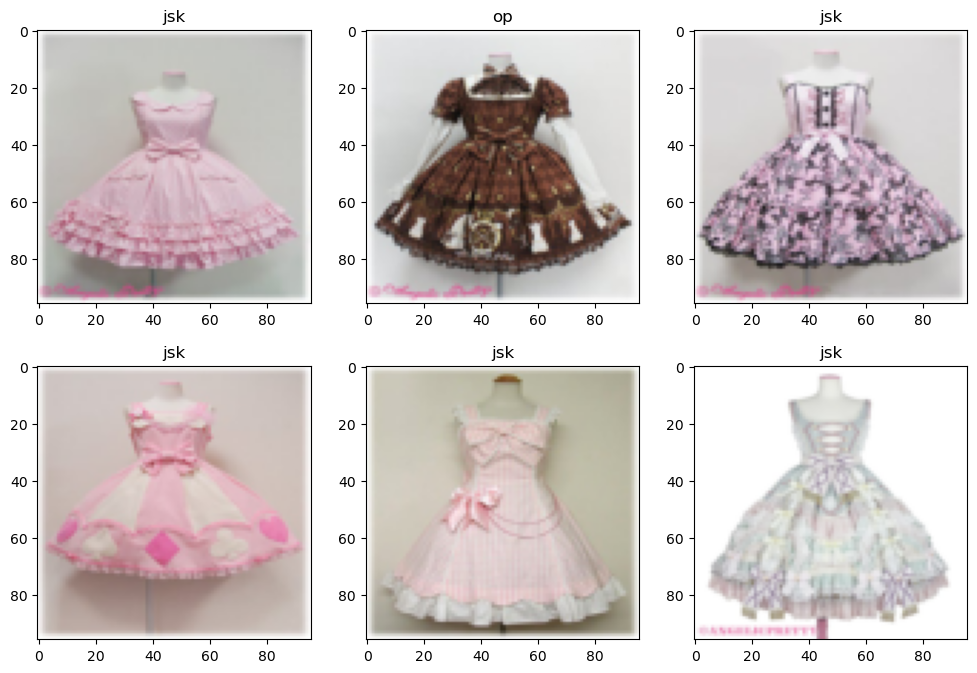

In [19]:
# 对数据进行转换处理
transform = transforms.Compose([
                transforms.Resize((96,96)), #做的第一步转换
                transforms.ToTensor() #第二步转换，作用：第一转换成Tensor，第二将图片取值范围转换成0-1之间，第三会将channel置前
])

class Mydatasetpro(data.Dataset):
# 类初始化
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform
# 进行切片
    def __getitem__(self, index):                #根据给出的索引进行切片，并对其进行数据处理转换成Tensor，返回成Tensor
        img = self.imgs[index]
        label = self.labels[index]
        pil_img = Image.open(img)                 #pip install pillow
        data = self.transforms(pil_img)
        return data, label
# 返回长度
    def __len__(self):
        return len(self.imgs)

BATCH_SIZE = 10
skirt_dataset = Mydatasetpro(all_imgs_path, all_labels, transform)
skirt_datalodaer = data.DataLoader(
                            skirt_dataset,
                            batch_size=20,
                            shuffle=True
)


imgs_batch, labels_batch = next(iter(skirt_datalodaer))

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_species.get(label.item()))
    plt.imshow(img)
plt.show()#展示图片


In [20]:

#划分测试集和训练集
index = np.random.permutation(len(all_imgs_path))
all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]

#80% as train
s = int(len(all_imgs_path)*0.8)
print(s)

train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]
print(test_labels)

trainset = Mydatasetpro(train_imgs, train_labels, transform) #TrainSet TensorData
testset = Mydatasetpro(test_imgs, test_labels, transform) #TestSet TensorData
print(trainset)
trainloader = data.DataLoader(trainset, batch_size=24, shuffle=True)#TrainSet Labels
testloader = data.DataLoader(testset, batch_size=24, shuffle=True)#TestSet Labels

244
[0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0]


In [21]:
model = torchvision.models.vgg16(pretrained=True)
num_classes = 2  # 获取类别数量
model.classifier[6] = nn.Linear(4096, num_classes)  # 修改最后一层的全连接层

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(5):  # 迭代训练5个epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
    
        optimizer.zero_grad() ## 梯度清零
        labels = torch.as_tensor(labels, dtype=torch.int64) #转为张量
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() #计算损失、反向传播、更新参数
        
        running_loss += loss.item()
        if i % 10 == 9:  # 每20个batch打印一次损失
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0



[1,    10] loss: 0.036
[2,    10] loss: 0.023
[3,    10] loss: 0.010
[4,    10] loss: 0.006
[5,    10] loss: 0.003


In [22]:
#验证集
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on test images: %.2f %%' % (100 * correct / total))

Accuracy on test images: 96.72 %
